In [3]:
import pandas as pd
import matplotlib.pyplot as plt


In [4]:
file_path = 'Transactions.csv'
transactions_data = pd.read_csv(file_path)


In [5]:
transactions_data['TransactionDate'] = pd.to_datetime(transactions_data['TransactionDate'])


# 1. Most Purchased Product


In [6]:
most_purchased_product = transactions_data['ProductID'].value_counts().idxmax()
most_purchased_product_count = transactions_data['ProductID'].value_counts().max()
product_counts = transactions_data['ProductID'].value_counts()


# Plot for Most Purchased Products


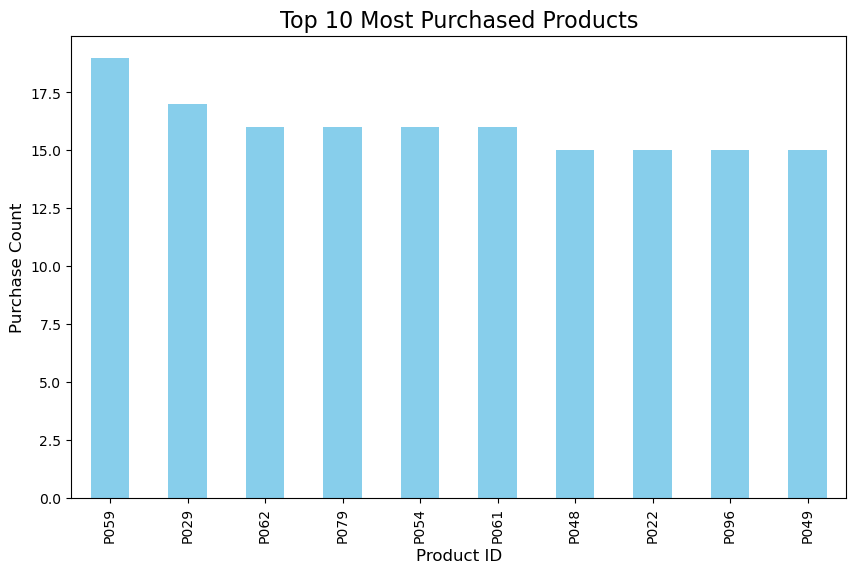

In [7]:
plt.figure(figsize=(10, 6))
product_counts.head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 Most Purchased Products', fontsize=16)
plt.xlabel('Product ID', fontsize=12)
plt.ylabel('Purchase Count', fontsize=12)
plt.show()



# 2. Total Revenue


In [8]:
total_revenue = transactions_data['TotalValue'].sum()


# 3. Highest Spending Customer


In [9]:
highest_spender = transactions_data.groupby('CustomerID')['TotalValue'].sum().idxmax()
highest_spender_amount = transactions_data.groupby('CustomerID')['TotalValue'].sum().max()
customer_spending = transactions_data.groupby('CustomerID')['TotalValue'].sum()


# Plot for Top Spending Customers


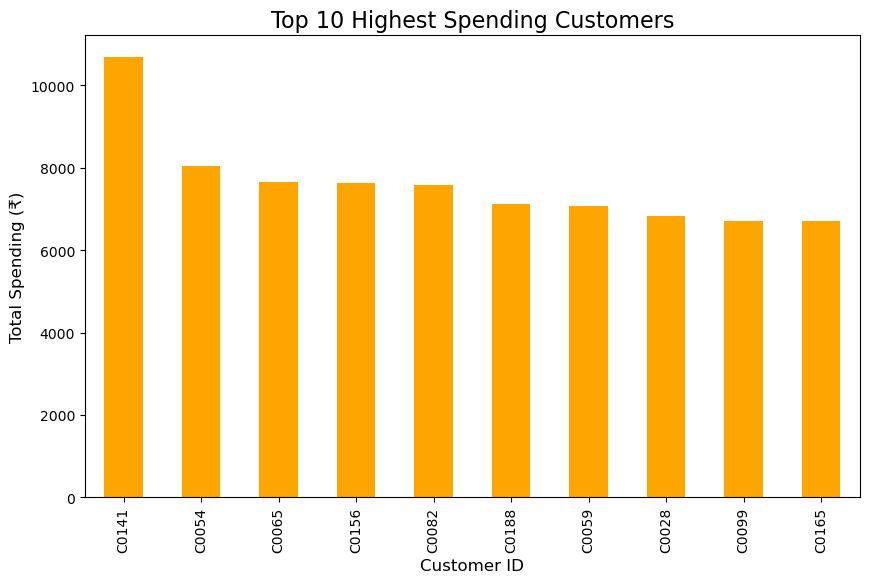

In [10]:
plt.figure(figsize=(10, 6))
customer_spending.nlargest(10).plot(kind='bar', color='orange')
plt.title('Top 10 Highest Spending Customers', fontsize=16)
plt.xlabel('Customer ID', fontsize=12)
plt.ylabel('Total Spending (₹)', fontsize=12)
plt.show()


# 4. Monthly Revenue Trends


In [11]:
monthly_revenue = transactions_data.resample('M', on='TransactionDate')['TotalValue'].sum()


# Plot for Monthly Revenue Trends


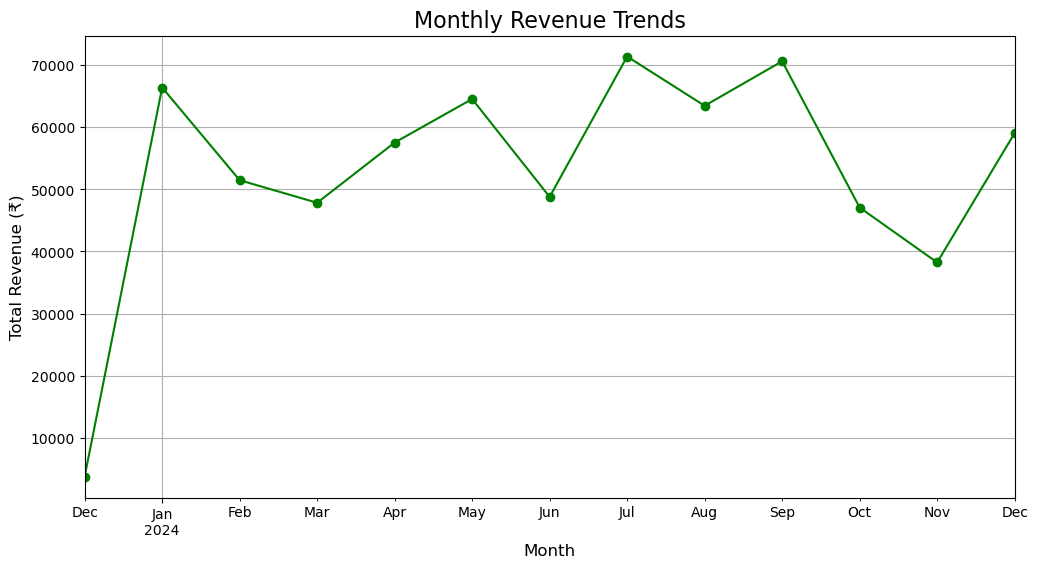

In [12]:
plt.figure(figsize=(12, 6))
monthly_revenue.plot(kind='line', marker='o', color='green')
plt.title('Monthly Revenue Trends', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Revenue (₹)', fontsize=12)
plt.grid()
plt.show()


# 5. Peak Transaction Time


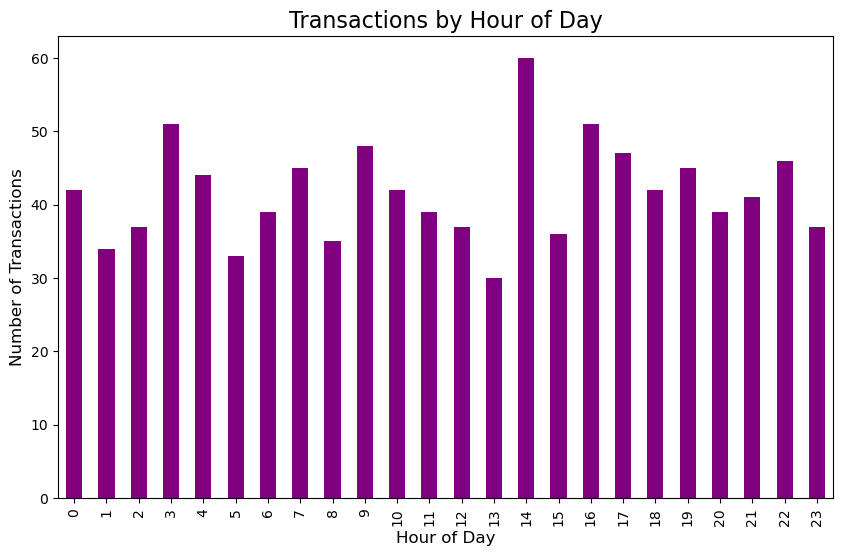

In [14]:
transactions_data['Hour'] = transactions_data['TransactionDate'].dt.hour
hourly_transactions = transactions_data['Hour'].value_counts().sort_index()

# Plot for Transactions by Hour
plt.figure(figsize=(10, 6))
hourly_transactions.plot(kind='bar', color='purple')
plt.title('Transactions by Hour of Day', fontsize=16)
plt.xlabel('Hour of Day', fontsize=12)
plt.ylabel('Number of Transactions', fontsize=12)
plt.show()


In [15]:
# Print the insights
print("1. Most Purchased Product:")
print(f"   - Product ID: {most_purchased_product}")
print(f"   - Total Purchases: {most_purchased_product_count}")

print("\n2. Total Revenue Generated:")
print(f"   - ₹{total_revenue:.2f}")

print("\n3. Highest Spending Customer:")
print(f"   - Customer ID: {highest_spender}")
print(f"   - Total Spending: ₹{highest_spender_amount:.2f}")

print("\n4. Monthly Revenue Trends:")
print(monthly_revenue)

print("\n5. Peak Transaction Time:")
print(f"   - Hour: {hourly_transactions.idxmax()}")
print(f"   - Total Transactions: {hourly_transactions.max()}")



1. Most Purchased Product:
   - Product ID: P059
   - Total Purchases: 19

2. Total Revenue Generated:
   - ₹689995.56

3. Highest Spending Customer:
   - Customer ID: C0141
   - Total Spending: ₹10673.87

4. Monthly Revenue Trends:
TransactionDate
2023-12-31     3769.52
2024-01-31    66376.39
2024-02-29    51459.27
2024-03-31    47828.73
2024-04-30    57519.06
2024-05-31    64527.74
2024-06-30    48771.18
2024-07-31    71366.39
2024-08-31    63436.74
2024-09-30    70603.75
2024-10-31    47063.22
2024-11-30    38224.37
2024-12-31    59049.20
Freq: M, Name: TotalValue, dtype: float64

5. Peak Transaction Time:
   - Hour: 14
   - Total Transactions: 60
